In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons,make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [2]:
# Generate synthetic dataset with clusters of varying densities and shapes
X, _ = make_blobs(n_samples=1000, centers=[[0, 0], [1, 1], [2, 2]], cluster_std=[1.0, 0.5, 1.5], random_state=42)

# Add noise to create significant overlap between clusters
noise = np.random.rand(500, 2) * 4 - 2
X = np.vstack((X, noise))

In [3]:
# Generate synthetic dataset with clusters of varying densities and shapes
X_moons, _ = make_moons(n_samples=500, noise=0.1, random_state=42)
X_blobs1, _ = make_blobs(n_samples=500, centers=[[2, 2], [2, 3]], cluster_std=[0.5, 0.5], random_state=42)
X_blobs2, _ = make_blobs(n_samples=500, centers=[[0, 0], [0, 1]], cluster_std=[0.5, 0.5], random_state=42)

# Combine datasets
X = np.vstack((X_moons, X_blobs1, X_blobs2))

In [4]:
# Fit K-means clustering
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)

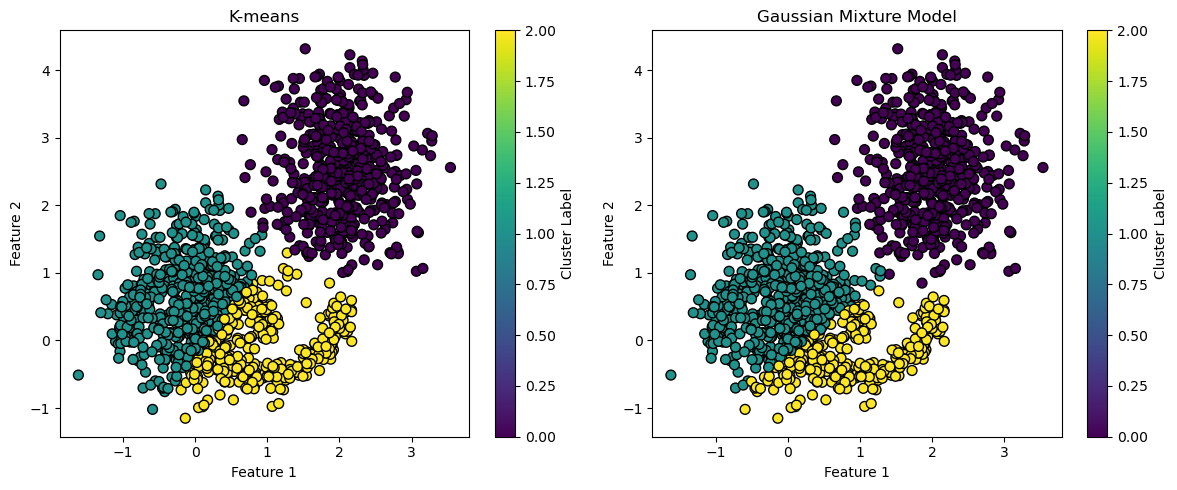

K-means Silhouette Score: 0.46638130033976016
Gaussian Mixture Model Silhouette Score: 0.46861687211964637


In [5]:
# Plot clustering results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')

plt.tight_layout()
plt.show()

# Compare silhouette scores
kmeans_silhouette = silhouette_score(X, kmeans_labels)
gmm_silhouette = silhouette_score(X, gmm_labels)

print(f'K-means Silhouette Score: {kmeans_silhouette}')
print(f'Gaussian Mixture Model Silhouette Score: {gmm_silhouette}')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/opt/homebrew/anaconda3/lib/pyth

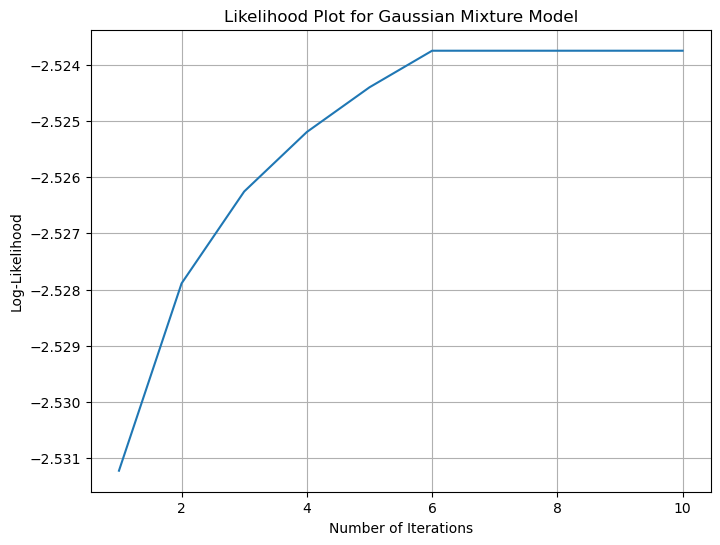

In [12]:
# Fit Gaussian Mixture Model with a specified number of iterations
n_iterations = 10
log_likelihoods = []

for i in range(1, n_iterations + 1):
    gmm = GaussianMixture(n_components=3, random_state=42, n_init=1, max_iter=i)
    gmm.fit(X)
    log_likelihoods.append(gmm.score(X))

# Plot likelihood plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, n_iterations + 1), log_likelihoods)
plt.title('Likelihood Plot for Gaussian Mixture Model')
plt.xlabel('Number of Iterations')
plt.ylabel('Log-Likelihood')
plt.grid(True)
plt.show()